## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  44.485237   253.229010  0.681047  1.848283  1.273471
1  50.866189  1449.520930  0.703099  5.315177  1.552199
2  42.826414   592.735548  0.238882  1.301643  1.427445
3  71.181621  1277.951386  0.374634  8.800277  1.308378
4  85.187944  1032.665724  0.966155  6.750593  1.453434


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.98251 | train_mse: 5.15616 | train_mae: 1.67526 |  0:00:00s
epoch 1  | loss: 1.09086 | train_mse: 3.49307 | train_mae: 1.46793 |  0:00:00s
epoch 2  | loss: 0.84574 | train_mse: 2.88477 | train_mae: 1.36557 |  0:00:00s


epoch 3  | loss: 0.96004 | train_mse: 2.42735 | train_mae: 1.26138 |  0:00:00s
epoch 4  | loss: 0.81582 | train_mse: 2.15006 | train_mae: 1.20678 |  0:00:00s


epoch 5  | loss: 0.78911 | train_mse: 2.07277 | train_mae: 1.16515 |  0:00:00s
epoch 6  | loss: 0.69327 | train_mse: 1.87258 | train_mae: 1.08773 |  0:00:00s
epoch 7  | loss: 0.81301 | train_mse: 1.6893  | train_mae: 1.03075 |  0:00:00s


epoch 8  | loss: 0.85778 | train_mse: 1.60296 | train_mae: 0.99949 |  0:00:01s
epoch 9  | loss: 0.70412 | train_mse: 1.49982 | train_mae: 0.95532 |  0:00:01s
epoch 10 | loss: 0.77379 | train_mse: 1.396   | train_mae: 0.91599 |  0:00:01s


epoch 11 | loss: 0.76723 | train_mse: 1.28748 | train_mae: 0.87614 |  0:00:01s
epoch 12 | loss: 0.77115 | train_mse: 1.18956 | train_mae: 0.8334  |  0:00:01s
epoch 13 | loss: 0.68237 | train_mse: 1.12059 | train_mae: 0.80662 |  0:00:01s


epoch 14 | loss: 0.75348 | train_mse: 1.06766 | train_mae: 0.78286 |  0:00:01s
epoch 15 | loss: 0.71541 | train_mse: 1.02787 | train_mae: 0.75803 |  0:00:01s


epoch 16 | loss: 0.69364 | train_mse: 1.00654 | train_mae: 0.74283 |  0:00:01s
epoch 17 | loss: 0.63729 | train_mse: 0.94421 | train_mae: 0.72074 |  0:00:01s
epoch 18 | loss: 0.59008 | train_mse: 0.89376 | train_mae: 0.70278 |  0:00:01s


epoch 19 | loss: 0.72716 | train_mse: 0.84231 | train_mae: 0.68038 |  0:00:02s
epoch 20 | loss: 0.63566 | train_mse: 0.80128 | train_mae: 0.66254 |  0:00:02s
epoch 21 | loss: 0.67463 | train_mse: 0.77534 | train_mae: 0.65046 |  0:00:02s


epoch 22 | loss: 0.72739 | train_mse: 0.75334 | train_mae: 0.64469 |  0:00:02s
epoch 23 | loss: 0.56118 | train_mse: 0.72323 | train_mae: 0.63089 |  0:00:02s
epoch 24 | loss: 0.60158 | train_mse: 0.69403 | train_mae: 0.61419 |  0:00:02s


epoch 25 | loss: 0.64345 | train_mse: 0.67191 | train_mae: 0.60594 |  0:00:02s
epoch 26 | loss: 0.53284 | train_mse: 0.65397 | train_mae: 0.59984 |  0:00:02s


epoch 27 | loss: 0.50212 | train_mse: 0.62871 | train_mae: 0.5879  |  0:00:02s
epoch 28 | loss: 0.65985 | train_mse: 0.6167  | train_mae: 0.58042 |  0:00:02s
epoch 29 | loss: 0.53641 | train_mse: 0.59952 | train_mae: 0.56837 |  0:00:03s


epoch 30 | loss: 0.67458 | train_mse: 0.58907 | train_mae: 0.5611  |  0:00:03s
epoch 31 | loss: 0.63603 | train_mse: 0.57848 | train_mae: 0.55598 |  0:00:03s


epoch 32 | loss: 0.50153 | train_mse: 0.56616 | train_mae: 0.54806 |  0:00:03s
epoch 33 | loss: 0.46472 | train_mse: 0.55416 | train_mae: 0.54146 |  0:00:03s
epoch 34 | loss: 0.43953 | train_mse: 0.54319 | train_mae: 0.53506 |  0:00:03s


epoch 35 | loss: 0.55174 | train_mse: 0.54277 | train_mae: 0.53654 |  0:00:03s
epoch 36 | loss: 0.47373 | train_mse: 0.54508 | train_mae: 0.53463 |  0:00:03s
epoch 37 | loss: 0.59677 | train_mse: 0.52975 | train_mae: 0.52444 |  0:00:03s


epoch 38 | loss: 0.46093 | train_mse: 0.50605 | train_mae: 0.51225 |  0:00:03s
epoch 39 | loss: 0.61256 | train_mse: 0.49018 | train_mae: 0.503   |  0:00:04s
epoch 40 | loss: 0.47682 | train_mse: 0.47948 | train_mae: 0.49508 |  0:00:04s


epoch 41 | loss: 0.43645 | train_mse: 0.46386 | train_mae: 0.49099 |  0:00:04s
epoch 42 | loss: 0.48689 | train_mse: 0.45029 | train_mae: 0.48475 |  0:00:04s
epoch 43 | loss: 0.32355 | train_mse: 0.43863 | train_mae: 0.47745 |  0:00:04s


epoch 44 | loss: 0.47543 | train_mse: 0.42447 | train_mae: 0.4703  |  0:00:04s
epoch 45 | loss: 0.55793 | train_mse: 0.41937 | train_mae: 0.46807 |  0:00:04s


epoch 46 | loss: 0.51539 | train_mse: 0.41312 | train_mae: 0.46493 |  0:00:04s
epoch 47 | loss: 0.50219 | train_mse: 0.40707 | train_mae: 0.46357 |  0:00:04s
epoch 48 | loss: 0.39029 | train_mse: 0.39515 | train_mae: 0.45789 |  0:00:04s


epoch 49 | loss: 0.48245 | train_mse: 0.39141 | train_mae: 0.45794 |  0:00:05s
epoch 50 | loss: 0.49486 | train_mse: 0.37992 | train_mae: 0.44958 |  0:00:05s
epoch 51 | loss: 0.46297 | train_mse: 0.37014 | train_mae: 0.44456 |  0:00:05s


epoch 52 | loss: 0.51157 | train_mse: 0.35762 | train_mae: 0.43522 |  0:00:05s
epoch 53 | loss: 0.46529 | train_mse: 0.35023 | train_mae: 0.42862 |  0:00:05s
epoch 54 | loss: 0.38646 | train_mse: 0.34121 | train_mae: 0.42495 |  0:00:05s


epoch 55 | loss: 0.38186 | train_mse: 0.33481 | train_mae: 0.4227  |  0:00:05s
epoch 56 | loss: 0.40498 | train_mse: 0.33393 | train_mae: 0.4251  |  0:00:05s


epoch 57 | loss: 0.49848 | train_mse: 0.33382 | train_mae: 0.4248  |  0:00:05s
epoch 58 | loss: 0.44733 | train_mse: 0.3331  | train_mae: 0.42328 |  0:00:05s
epoch 59 | loss: 0.37964 | train_mse: 0.33556 | train_mae: 0.42217 |  0:00:06s


epoch 60 | loss: 0.3785  | train_mse: 0.33418 | train_mae: 0.42049 |  0:00:06s
epoch 61 | loss: 0.40295 | train_mse: 0.3236  | train_mae: 0.41589 |  0:00:06s
epoch 62 | loss: 0.33337 | train_mse: 0.31599 | train_mae: 0.40789 |  0:00:06s


epoch 63 | loss: 0.334   | train_mse: 0.30892 | train_mae: 0.40541 |  0:00:06s
epoch 64 | loss: 0.43023 | train_mse: 0.30089 | train_mae: 0.39961 |  0:00:06s
epoch 65 | loss: 0.3668  | train_mse: 0.29768 | train_mae: 0.39368 |  0:00:06s


epoch 66 | loss: 0.42099 | train_mse: 0.28972 | train_mae: 0.39311 |  0:00:06s
epoch 67 | loss: 0.39483 | train_mse: 0.2852  | train_mae: 0.3916  |  0:00:06s
epoch 68 | loss: 0.30602 | train_mse: 0.27629 | train_mae: 0.38674 |  0:00:06s


epoch 69 | loss: 0.29482 | train_mse: 0.27028 | train_mae: 0.38421 |  0:00:07s
epoch 70 | loss: 0.40111 | train_mse: 0.26415 | train_mae: 0.38242 |  0:00:07s
epoch 71 | loss: 0.39572 | train_mse: 0.26452 | train_mae: 0.38473 |  0:00:07s


epoch 72 | loss: 0.38377 | train_mse: 0.26089 | train_mae: 0.38339 |  0:00:07s
epoch 73 | loss: 0.50737 | train_mse: 0.25499 | train_mae: 0.38082 |  0:00:07s
epoch 74 | loss: 0.32321 | train_mse: 0.25212 | train_mae: 0.37825 |  0:00:07s


epoch 75 | loss: 0.36605 | train_mse: 0.24427 | train_mae: 0.37098 |  0:00:07s
epoch 76 | loss: 0.32113 | train_mse: 0.23845 | train_mae: 0.36558 |  0:00:07s


epoch 77 | loss: 0.34437 | train_mse: 0.23345 | train_mae: 0.36016 |  0:00:07s
epoch 78 | loss: 0.4278  | train_mse: 0.22771 | train_mae: 0.3554  |  0:00:07s
epoch 79 | loss: 0.26303 | train_mse: 0.22426 | train_mae: 0.35285 |  0:00:07s


epoch 80 | loss: 0.35703 | train_mse: 0.22303 | train_mae: 0.35322 |  0:00:08s
epoch 81 | loss: 0.40395 | train_mse: 0.22409 | train_mae: 0.35673 |  0:00:08s
epoch 82 | loss: 0.30769 | train_mse: 0.22338 | train_mae: 0.35599 |  0:00:08s


epoch 83 | loss: 0.38063 | train_mse: 0.21972 | train_mae: 0.3545  |  0:00:08s
epoch 84 | loss: 0.44256 | train_mse: 0.21765 | train_mae: 0.35163 |  0:00:08s
epoch 85 | loss: 0.36091 | train_mse: 0.21388 | train_mae: 0.34832 |  0:00:08s


epoch 86 | loss: 0.53386 | train_mse: 0.20965 | train_mae: 0.34573 |  0:00:08s
epoch 87 | loss: 0.39245 | train_mse: 0.20658 | train_mae: 0.34209 |  0:00:08s


epoch 88 | loss: 0.32439 | train_mse: 0.20147 | train_mae: 0.33533 |  0:00:08s
epoch 89 | loss: 0.28575 | train_mse: 0.19917 | train_mae: 0.33439 |  0:00:08s
epoch 90 | loss: 0.35076 | train_mse: 0.19984 | train_mae: 0.33905 |  0:00:08s


epoch 91 | loss: 0.33681 | train_mse: 0.19671 | train_mae: 0.33674 |  0:00:09s
epoch 92 | loss: 0.28457 | train_mse: 0.1919  | train_mae: 0.33337 |  0:00:09s
epoch 93 | loss: 0.31463 | train_mse: 0.1901  | train_mae: 0.33332 |  0:00:09s


epoch 94 | loss: 0.4257  | train_mse: 0.18813 | train_mae: 0.33588 |  0:00:09s
epoch 95 | loss: 0.24252 | train_mse: 0.18691 | train_mae: 0.33675 |  0:00:09s
epoch 96 | loss: 0.34115 | train_mse: 0.18577 | train_mae: 0.33441 |  0:00:09s


epoch 97 | loss: 0.33227 | train_mse: 0.18843 | train_mae: 0.33941 |  0:00:09s
epoch 98 | loss: 0.21898 | train_mse: 0.18669 | train_mae: 0.33818 |  0:00:09s


epoch 99 | loss: 0.35529 | train_mse: 0.18705 | train_mae: 0.34127 |  0:00:09s
epoch 100| loss: 0.29827 | train_mse: 0.1896  | train_mae: 0.34508 |  0:00:09s
epoch 101| loss: 0.26776 | train_mse: 0.18597 | train_mae: 0.34031 |  0:00:09s


epoch 102| loss: 0.26678 | train_mse: 0.18088 | train_mae: 0.33504 |  0:00:10s
epoch 103| loss: 0.23898 | train_mse: 0.1745  | train_mae: 0.32696 |  0:00:10s
epoch 104| loss: 0.2133  | train_mse: 0.17172 | train_mae: 0.32182 |  0:00:10s


epoch 105| loss: 0.28255 | train_mse: 0.16883 | train_mae: 0.32403 |  0:00:10s
epoch 106| loss: 0.22562 | train_mse: 0.16492 | train_mae: 0.32136 |  0:00:10s
epoch 107| loss: 0.25562 | train_mse: 0.16083 | train_mae: 0.3148  |  0:00:10s


epoch 108| loss: 0.3032  | train_mse: 0.16038 | train_mae: 0.31672 |  0:00:10s
epoch 109| loss: 0.36871 | train_mse: 0.16071 | train_mae: 0.31912 |  0:00:10s


epoch 110| loss: 0.26813 | train_mse: 0.15781 | train_mae: 0.31796 |  0:00:10s
epoch 111| loss: 0.22288 | train_mse: 0.15914 | train_mae: 0.31947 |  0:00:10s
epoch 112| loss: 0.24612 | train_mse: 0.16077 | train_mae: 0.32194 |  0:00:10s


epoch 113| loss: 0.30771 | train_mse: 0.15522 | train_mae: 0.31765 |  0:00:11s
epoch 114| loss: 0.32135 | train_mse: 0.14755 | train_mae: 0.3085  |  0:00:11s
epoch 115| loss: 0.27873 | train_mse: 0.14128 | train_mae: 0.30107 |  0:00:11s


epoch 116| loss: 0.26819 | train_mse: 0.14157 | train_mae: 0.30373 |  0:00:11s
epoch 117| loss: 0.30762 | train_mse: 0.14074 | train_mae: 0.30098 |  0:00:11s
epoch 118| loss: 0.20637 | train_mse: 0.15864 | train_mae: 0.31098 |  0:00:11s


epoch 119| loss: 0.38568 | train_mse: 0.17582 | train_mae: 0.31867 |  0:00:11s
epoch 120| loss: 0.22945 | train_mse: 0.17425 | train_mae: 0.31751 |  0:00:11s
epoch 121| loss: 0.24679 | train_mse: 0.17334 | train_mae: 0.31787 |  0:00:11s


epoch 122| loss: 0.27192 | train_mse: 0.17264 | train_mae: 0.3168  |  0:00:11s
epoch 123| loss: 0.28338 | train_mse: 0.17246 | train_mae: 0.31716 |  0:00:11s
epoch 124| loss: 0.3139  | train_mse: 0.17063 | train_mae: 0.31691 |  0:00:12s


epoch 125| loss: 0.20654 | train_mse: 0.17003 | train_mae: 0.31698 |  0:00:12s
epoch 126| loss: 0.22258 | train_mse: 0.167   | train_mae: 0.31461 |  0:00:12s
epoch 127| loss: 0.22858 | train_mse: 0.14665 | train_mae: 0.30467 |  0:00:12s


epoch 128| loss: 0.30151 | train_mse: 0.13965 | train_mae: 0.29866 |  0:00:12s
epoch 129| loss: 0.23488 | train_mse: 0.14801 | train_mae: 0.30842 |  0:00:12s
epoch 130| loss: 0.23433 | train_mse: 0.14819 | train_mae: 0.30853 |  0:00:12s


epoch 131| loss: 0.22275 | train_mse: 0.14755 | train_mae: 0.30531 |  0:00:12s
epoch 132| loss: 0.24801 | train_mse: 0.14402 | train_mae: 0.30415 |  0:00:12s
epoch 133| loss: 0.22519 | train_mse: 0.13971 | train_mae: 0.30236 |  0:00:12s


epoch 134| loss: 0.26594 | train_mse: 0.13727 | train_mae: 0.30059 |  0:00:12s
epoch 135| loss: 0.32729 | train_mse: 0.13294 | train_mae: 0.29501 |  0:00:13s
epoch 136| loss: 0.32598 | train_mse: 0.12399 | train_mae: 0.28665 |  0:00:13s


epoch 137| loss: 0.16515 | train_mse: 0.12402 | train_mae: 0.28522 |  0:00:13s
epoch 138| loss: 0.15828 | train_mse: 0.12332 | train_mae: 0.28484 |  0:00:13s
epoch 139| loss: 0.2996  | train_mse: 0.12654 | train_mae: 0.28705 |  0:00:13s


epoch 140| loss: 0.22586 | train_mse: 0.12807 | train_mae: 0.28737 |  0:00:13s
epoch 141| loss: 0.19436 | train_mse: 0.12613 | train_mae: 0.28544 |  0:00:13s


epoch 142| loss: 0.29818 | train_mse: 0.12353 | train_mae: 0.28499 |  0:00:13s
epoch 143| loss: 0.16433 | train_mse: 0.12365 | train_mae: 0.28385 |  0:00:13s
epoch 144| loss: 0.20116 | train_mse: 0.11697 | train_mae: 0.27793 |  0:00:13s


epoch 145| loss: 0.32648 | train_mse: 0.11353 | train_mae: 0.27321 |  0:00:14s
epoch 146| loss: 0.22647 | train_mse: 0.12064 | train_mae: 0.28343 |  0:00:14s
epoch 147| loss: 0.20764 | train_mse: 0.13678 | train_mae: 0.291   |  0:00:14s


epoch 148| loss: 0.27084 | train_mse: 0.13203 | train_mae: 0.28646 |  0:00:14s
epoch 149| loss: 0.26858 | train_mse: 0.11967 | train_mae: 0.27876 |  0:00:14s
epoch 150| loss: 0.25727 | train_mse: 0.11553 | train_mae: 0.27664 |  0:00:14s


epoch 151| loss: 0.23922 | train_mse: 0.10989 | train_mae: 0.27152 |  0:00:14s
epoch 152| loss: 0.21017 | train_mse: 0.11751 | train_mae: 0.27447 |  0:00:14s


epoch 153| loss: 0.19118 | train_mse: 0.11089 | train_mae: 0.2713  |  0:00:14s
epoch 154| loss: 0.29736 | train_mse: 0.12955 | train_mae: 0.28062 |  0:00:14s
epoch 155| loss: 0.16561 | train_mse: 0.1359  | train_mae: 0.28263 |  0:00:14s


epoch 156| loss: 0.2819  | train_mse: 0.13794 | train_mae: 0.2832  |  0:00:15s
epoch 157| loss: 0.21236 | train_mse: 0.13842 | train_mae: 0.28351 |  0:00:15s
epoch 158| loss: 0.26682 | train_mse: 0.13939 | train_mae: 0.28586 |  0:00:15s


epoch 159| loss: 0.23356 | train_mse: 0.14035 | train_mae: 0.29051 |  0:00:15s
epoch 160| loss: 0.28074 | train_mse: 0.14033 | train_mae: 0.29269 |  0:00:15s
epoch 161| loss: 0.45046 | train_mse: 0.14406 | train_mae: 0.29839 |  0:00:15s


epoch 162| loss: 0.25489 | train_mse: 0.14476 | train_mae: 0.30024 |  0:00:15s
epoch 163| loss: 0.20372 | train_mse: 0.14377 | train_mae: 0.29892 |  0:00:15s
epoch 164| loss: 0.25002 | train_mse: 0.14009 | train_mae: 0.29595 |  0:00:15s


epoch 165| loss: 0.39613 | train_mse: 0.13852 | train_mae: 0.29497 |  0:00:15s
epoch 166| loss: 0.22884 | train_mse: 0.13608 | train_mae: 0.29225 |  0:00:15s
epoch 167| loss: 0.21331 | train_mse: 0.13388 | train_mae: 0.29124 |  0:00:15s


epoch 168| loss: 0.18015 | train_mse: 0.13164 | train_mae: 0.28677 |  0:00:16s
epoch 169| loss: 0.21895 | train_mse: 0.12989 | train_mae: 0.28572 |  0:00:16s
epoch 170| loss: 0.23831 | train_mse: 0.12885 | train_mae: 0.28681 |  0:00:16s


epoch 171| loss: 0.30509 | train_mse: 0.12719 | train_mae: 0.28409 |  0:00:16s
epoch 172| loss: 0.17239 | train_mse: 0.12557 | train_mae: 0.28102 |  0:00:16s
epoch 173| loss: 0.34139 | train_mse: 0.12465 | train_mae: 0.28047 |  0:00:16s


epoch 174| loss: 0.2638  | train_mse: 0.1256  | train_mae: 0.2812  |  0:00:16s
epoch 175| loss: 0.2099  | train_mse: 0.12335 | train_mae: 0.28209 |  0:00:16s


epoch 176| loss: 0.20413 | train_mse: 0.11883 | train_mae: 0.27989 |  0:00:16s
epoch 177| loss: 0.19973 | train_mse: 0.11354 | train_mae: 0.27923 |  0:00:16s
epoch 178| loss: 0.17871 | train_mse: 0.1224  | train_mae: 0.28614 |  0:00:17s
epoch 179| loss: 0.17949 | train_mse: 0.12334 | train_mae: 0.2862  |  0:00:17s


epoch 180| loss: 0.15702 | train_mse: 0.12704 | train_mae: 0.28715 |  0:00:17s
epoch 181| loss: 0.22178 | train_mse: 0.12659 | train_mae: 0.28503 |  0:00:17s
epoch 182| loss: 0.30152 | train_mse: 0.12479 | train_mae: 0.28128 |  0:00:17s


epoch 183| loss: 0.20808 | train_mse: 0.12206 | train_mae: 0.2764  |  0:00:17s
epoch 184| loss: 0.23874 | train_mse: 0.11987 | train_mae: 0.27338 |  0:00:17s
epoch 185| loss: 0.18858 | train_mse: 0.11814 | train_mae: 0.26992 |  0:00:17s


epoch 186| loss: 0.19928 | train_mse: 0.11757 | train_mae: 0.27005 |  0:00:17s
epoch 187| loss: 0.17039 | train_mse: 0.11686 | train_mae: 0.27064 |  0:00:17s
epoch 188| loss: 0.16705 | train_mse: 0.11424 | train_mae: 0.26907 |  0:00:17s


epoch 189| loss: 0.18388 | train_mse: 0.11118 | train_mae: 0.26718 |  0:00:18s
epoch 190| loss: 0.16079 | train_mse: 0.11052 | train_mae: 0.26695 |  0:00:18s
epoch 191| loss: 0.19146 | train_mse: 0.10819 | train_mae: 0.26536 |  0:00:18s


epoch 192| loss: 0.26266 | train_mse: 0.10556 | train_mae: 0.26369 |  0:00:18s
epoch 193| loss: 0.25848 | train_mse: 0.10462 | train_mae: 0.26048 |  0:00:18s
epoch 194| loss: 0.23112 | train_mse: 0.10322 | train_mae: 0.26107 |  0:00:18s


epoch 195| loss: 0.23707 | train_mse: 0.1004  | train_mae: 0.25889 |  0:00:18s
epoch 196| loss: 0.29099 | train_mse: 0.09548 | train_mae: 0.25302 |  0:00:18s


epoch 197| loss: 0.23592 | train_mse: 0.08947 | train_mae: 0.24617 |  0:00:18s
epoch 198| loss: 0.26557 | train_mse: 0.09249 | train_mae: 0.25    |  0:00:18s
epoch 199| loss: 0.27865 | train_mse: 0.09296 | train_mae: 0.25233 |  0:00:19s


epoch 200| loss: 0.18619 | train_mse: 0.08885 | train_mae: 0.25101 |  0:00:19s
epoch 201| loss: 0.23305 | train_mse: 0.08592 | train_mae: 0.24687 |  0:00:19s
epoch 202| loss: 0.16798 | train_mse: 0.09892 | train_mae: 0.25645 |  0:00:19s


epoch 203| loss: 0.1777  | train_mse: 0.09968 | train_mae: 0.2561  |  0:00:19s
epoch 204| loss: 0.18437 | train_mse: 0.09425 | train_mae: 0.25669 |  0:00:19s


epoch 205| loss: 0.34502 | train_mse: 0.09532 | train_mae: 0.25813 |  0:00:19s
epoch 206| loss: 0.25153 | train_mse: 0.09339 | train_mae: 0.2546  |  0:00:19s
epoch 207| loss: 0.15049 | train_mse: 0.09009 | train_mae: 0.24946 |  0:00:19s


epoch 208| loss: 0.14603 | train_mse: 0.08494 | train_mae: 0.24232 |  0:00:19s
epoch 209| loss: 0.19604 | train_mse: 0.08325 | train_mae: 0.23797 |  0:00:20s
epoch 210| loss: 0.23734 | train_mse: 0.08219 | train_mae: 0.24021 |  0:00:20s


epoch 211| loss: 0.24575 | train_mse: 0.09287 | train_mae: 0.25087 |  0:00:20s
epoch 212| loss: 0.14818 | train_mse: 0.10165 | train_mae: 0.2584  |  0:00:20s
epoch 213| loss: 0.23157 | train_mse: 0.11148 | train_mae: 0.26264 |  0:00:20s


epoch 214| loss: 0.31383 | train_mse: 0.11597 | train_mae: 0.26214 |  0:00:20s
epoch 215| loss: 0.23872 | train_mse: 0.11914 | train_mae: 0.26177 |  0:00:20s


epoch 216| loss: 0.23096 | train_mse: 0.11775 | train_mae: 0.26094 |  0:00:20s
epoch 217| loss: 0.26184 | train_mse: 0.1095  | train_mae: 0.25543 |  0:00:20s
epoch 218| loss: 0.20495 | train_mse: 0.10425 | train_mae: 0.252   |  0:00:20s
epoch 219| loss: 0.18012 | train_mse: 0.10073 | train_mae: 0.24821 |  0:00:20s


epoch 220| loss: 0.1998  | train_mse: 0.09697 | train_mae: 0.24842 |  0:00:21s
epoch 221| loss: 0.15574 | train_mse: 0.09444 | train_mae: 0.24583 |  0:00:21s
epoch 222| loss: 0.23626 | train_mse: 0.09487 | train_mae: 0.246   |  0:00:21s


epoch 223| loss: 0.2155  | train_mse: 0.09524 | train_mae: 0.24342 |  0:00:21s
epoch 224| loss: 0.2013  | train_mse: 0.09207 | train_mae: 0.2418  |  0:00:21s
epoch 225| loss: 0.17889 | train_mse: 0.08928 | train_mae: 0.23991 |  0:00:21s


epoch 226| loss: 0.17434 | train_mse: 0.08128 | train_mae: 0.23221 |  0:00:21s
epoch 227| loss: 0.19319 | train_mse: 0.07972 | train_mae: 0.23096 |  0:00:21s


epoch 228| loss: 0.1497  | train_mse: 0.09219 | train_mae: 0.2394  |  0:00:21s
epoch 229| loss: 0.163   | train_mse: 0.09385 | train_mae: 0.24105 |  0:00:21s
epoch 230| loss: 0.22748 | train_mse: 0.09664 | train_mae: 0.24432 |  0:00:22s


epoch 231| loss: 0.20784 | train_mse: 0.10116 | train_mae: 0.24846 |  0:00:22s
epoch 232| loss: 0.1405  | train_mse: 0.09962 | train_mae: 0.24916 |  0:00:22s
epoch 233| loss: 0.1923  | train_mse: 0.09809 | train_mae: 0.24948 |  0:00:22s


epoch 234| loss: 0.21421 | train_mse: 0.0989  | train_mae: 0.25032 |  0:00:22s
epoch 235| loss: 0.2039  | train_mse: 0.10029 | train_mae: 0.25246 |  0:00:22s
epoch 236| loss: 0.19009 | train_mse: 0.10063 | train_mae: 0.25284 |  0:00:22s


epoch 237| loss: 0.20081 | train_mse: 0.09985 | train_mae: 0.25025 |  0:00:22s
epoch 238| loss: 0.30811 | train_mse: 0.10068 | train_mae: 0.25093 |  0:00:22s


epoch 239| loss: 0.17492 | train_mse: 0.10202 | train_mae: 0.25078 |  0:00:22s
epoch 240| loss: 0.1733  | train_mse: 0.1039  | train_mae: 0.25216 |  0:00:23s


epoch 241| loss: 0.27581 | train_mse: 0.10498 | train_mae: 0.25459 |  0:00:23s
epoch 242| loss: 0.18522 | train_mse: 0.105   | train_mae: 0.25468 |  0:00:23s
epoch 243| loss: 0.22684 | train_mse: 0.10434 | train_mae: 0.25641 |  0:00:23s


epoch 244| loss: 0.30464 | train_mse: 0.10215 | train_mae: 0.25723 |  0:00:23s
epoch 245| loss: 0.16971 | train_mse: 0.09232 | train_mae: 0.24985 |  0:00:23s


epoch 246| loss: 0.20453 | train_mse: 0.09451 | train_mae: 0.25452 |  0:00:23s
epoch 247| loss: 0.20969 | train_mse: 0.1038  | train_mae: 0.26475 |  0:00:23s


epoch 248| loss: 0.2222  | train_mse: 0.10675 | train_mae: 0.26673 |  0:00:23s
epoch 249| loss: 0.18898 | train_mse: 0.11056 | train_mae: 0.27018 |  0:00:23s
epoch 250| loss: 0.16968 | train_mse: 0.11064 | train_mae: 0.27152 |  0:00:23s


epoch 251| loss: 0.19917 | train_mse: 0.11037 | train_mae: 0.27106 |  0:00:24s
epoch 252| loss: 0.14758 | train_mse: 0.10688 | train_mae: 0.26465 |  0:00:24s
epoch 253| loss: 0.15023 | train_mse: 0.10161 | train_mae: 0.26033 |  0:00:24s


epoch 254| loss: 0.18017 | train_mse: 0.10009 | train_mae: 0.25713 |  0:00:24s
epoch 255| loss: 0.16699 | train_mse: 0.09953 | train_mae: 0.25533 |  0:00:24s
epoch 256| loss: 0.1441  | train_mse: 0.09861 | train_mae: 0.25425 |  0:00:24s


epoch 257| loss: 0.16555 | train_mse: 0.09657 | train_mae: 0.25347 |  0:00:24s
epoch 258| loss: 0.14959 | train_mse: 0.09602 | train_mae: 0.25261 |  0:00:24s
epoch 259| loss: 0.18948 | train_mse: 0.09194 | train_mae: 0.24817 |  0:00:24s


epoch 260| loss: 0.14093 | train_mse: 0.09032 | train_mae: 0.24334 |  0:00:24s
epoch 261| loss: 0.15355 | train_mse: 0.08087 | train_mae: 0.23458 |  0:00:25s
epoch 262| loss: 0.16631 | train_mse: 0.08044 | train_mae: 0.23427 |  0:00:25s


epoch 263| loss: 0.22875 | train_mse: 0.08495 | train_mae: 0.23923 |  0:00:25s
epoch 264| loss: 0.17265 | train_mse: 0.08996 | train_mae: 0.24355 |  0:00:25s
epoch 265| loss: 0.29677 | train_mse: 0.08661 | train_mae: 0.24279 |  0:00:25s


epoch 266| loss: 0.16391 | train_mse: 0.08854 | train_mae: 0.24708 |  0:00:25s
epoch 267| loss: 0.18609 | train_mse: 0.08556 | train_mae: 0.24321 |  0:00:25s


epoch 268| loss: 0.21075 | train_mse: 0.09348 | train_mae: 0.25074 |  0:00:25s
epoch 269| loss: 0.14876 | train_mse: 0.09661 | train_mae: 0.25225 |  0:00:25s


epoch 270| loss: 0.18605 | train_mse: 0.08912 | train_mae: 0.24683 |  0:00:25s
epoch 271| loss: 0.17089 | train_mse: 0.08552 | train_mae: 0.24392 |  0:00:25s
epoch 272| loss: 0.12093 | train_mse: 0.09011 | train_mae: 0.24919 |  0:00:26s


epoch 273| loss: 0.16805 | train_mse: 0.08276 | train_mae: 0.23941 |  0:00:26s
epoch 274| loss: 0.19403 | train_mse: 0.08158 | train_mae: 0.23898 |  0:00:26s


epoch 275| loss: 0.34147 | train_mse: 0.09532 | train_mae: 0.25066 |  0:00:26s
epoch 276| loss: 0.15451 | train_mse: 0.09829 | train_mae: 0.25543 |  0:00:26s
epoch 277| loss: 0.19502 | train_mse: 0.09614 | train_mae: 0.25488 |  0:00:26s

Early stopping occurred at epoch 277 with best_epoch = 227 and best_train_mae = 0.23096
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.5003084981131432


ABC Pre-generator MAE 1.0949775255347105


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

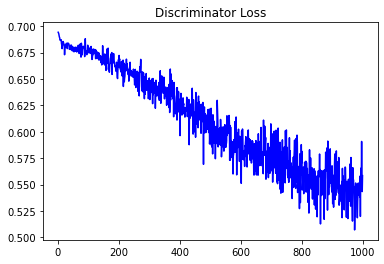

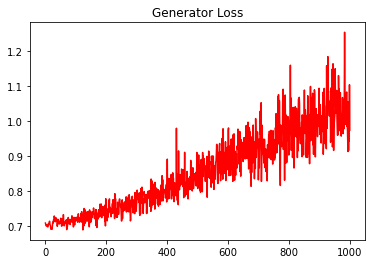

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.45373726487532257


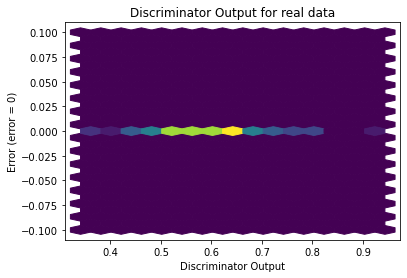

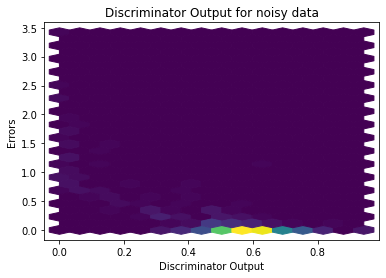

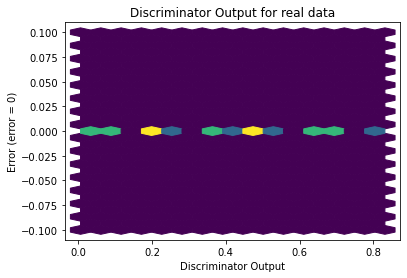

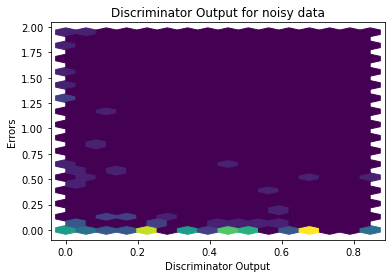

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


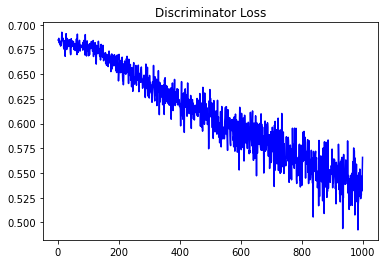

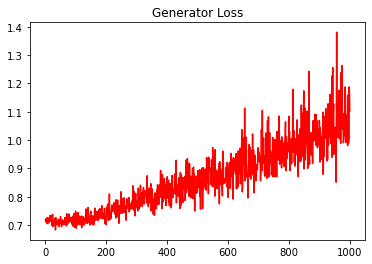

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.5646832781299017


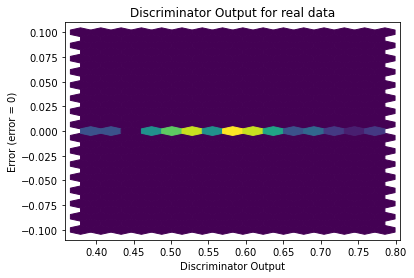

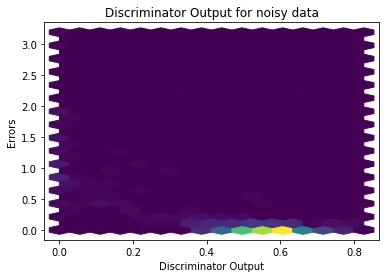

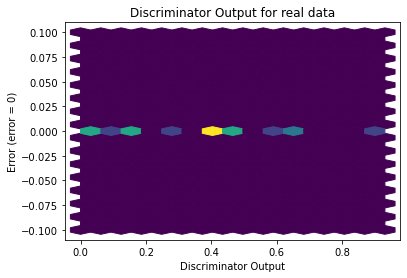

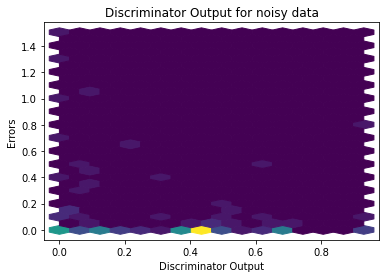

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8006]], requires_grad=True)
